In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet, NASNetMobile
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, GlobalAveragePooling2D,Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
number_of_classes = 4
batch_size = 16
epochs = 30
file_path_train = '/Users/ismaileza/Desktop/grad/archive/training'
file_path_test = '/Users/ismaileza/Desktop/grad/archive/testing'
train_datagenetor = ImageDataGenerator()
test_datagenetor = ImageDataGenerator()

In [3]:
train_data = train_datagenetor.flow_from_directory(
    file_path_train,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagenetor.flow_from_directory(
    file_path_test,
    target_size=(224, 224),
    shuffle = False,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)

x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(number_of_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=predictions)


custom_optimizer = Adam(lr=0.0001)  
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, epochs=epochs)

score = model.evaluate(test_data)


print('Test accuracy:', score[1])

Epoch 1/30
357/357 [==============================] - 198s 553ms/step - loss: 3.5998 - accuracy: 0.6047
Epoch 2/30
357/357 [==============================] - 212s 594ms/step - loss: 0.7558 - accuracy: 0.7132
Epoch 3/30
357/357 [==============================] - 213s 597ms/step - loss: 0.6366 - accuracy: 0.7593
Epoch 4/30
357/357 [==============================] - 215s 601ms/step - loss: 0.7000 - accuracy: 0.7666
Epoch 5/30
357/357 [==============================] - 216s 606ms/step - loss: 0.4791 - accuracy: 0.8298
Epoch 6/30
357/357 [==============================] - 217s 607ms/step - loss: 0.4198 - accuracy: 0.8594
Epoch 7/30
357/357 [==============================] - 218s 610ms/step - loss: 0.3704 - accuracy: 0.8759
Epoch 8/30
357/357 [==============================] - 1378s 4s/step - loss: 0.3218 - accuracy: 0.8897
Epoch 9/30
357/357 [==============================] - 1086s 3s/step - loss: 0.3034 - accuracy: 0.8990
Epoch 10/30
357/357 [==============================] - 210s 589ms/st

82/82 [==============================] - 10s 113ms/step
Accuracy: 0.938977879481312
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       300
           1       0.96      0.85      0.90       306
           2       0.98      1.00      0.99       405
           3       0.99      0.92      0.95       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.94      1311
weighted avg       0.94      0.94      0.94      1311



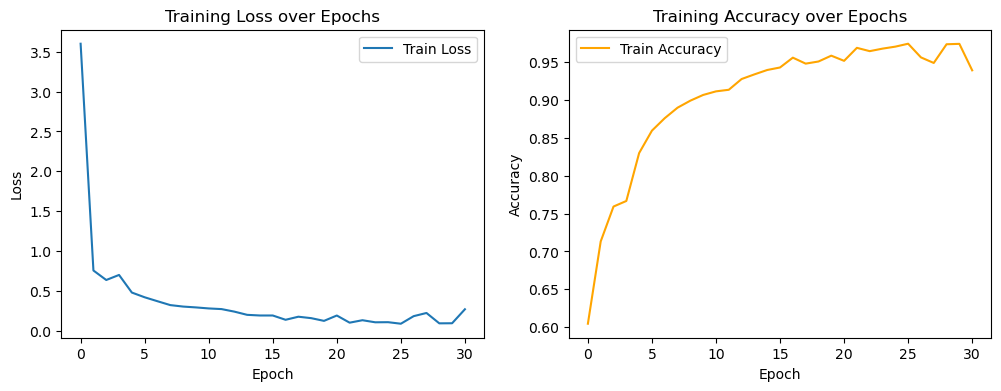

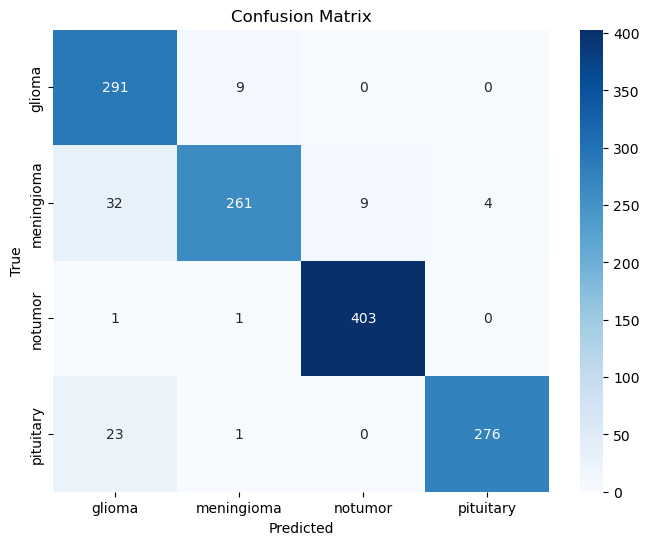

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data.classes

accuracy = accuracy_score(true_classes, predicted_classes)
print('Accuracy:', accuracy)

report = classification_report(true_classes, predicted_classes)
print('Classification Report:\n', report)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

y_true = test_data.classes
y_pred_classes = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices, yticklabels=train_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model.save('Alex_NET_Model_Result2.h5')